In [25]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [26]:
(X_train,y_train) , (X_test,y_test)= keras.datasets.mnist.load_data()

In [27]:
len(X_train)

60000

In [28]:
len(X_test)

10000

In [29]:
X_train[0].shape

(28, 28)

In [30]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

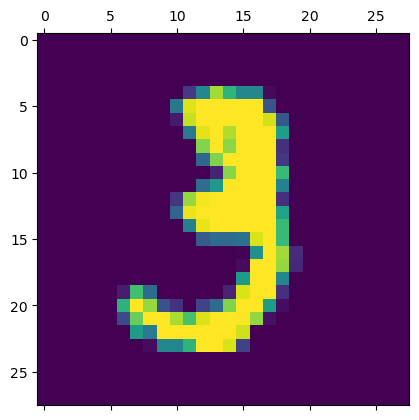

In [31]:
plt.matshow(X_train[10])

In [32]:
y_train[10]

3

In [33]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [34]:
X_train.shape

(60000, 28, 28)

In [35]:
#Scaling it to between 0 and 1 by diving with 255

In [36]:
X_train=X_train/255
X_test=X_test/255

In [37]:
#Flatten the shape of input from 28*28 dimension to single dimension of 784

In [38]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)



In [39]:
#we can used keras.layers.Flatten(input_shape=(28,28)) as well. I've used it below

In [40]:
#X_train_flattened.shape

In [41]:
#X_test_flattened.shape

In [42]:
#X_train_flattened[0]

In [43]:
#Model without hidden layer

In [45]:
model =keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4718 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3039 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9237
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9259


In [46]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2674 - accuracy: 0.9252


[0.2673802077770233, 0.9251999855041504]

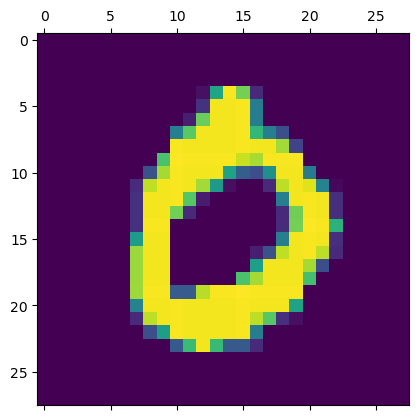

In [47]:
plt.matshow(X_test[3])

In [48]:
y_predicted=model.predict(X_test_flattened)
y_predicted[3]

313/313 [==============================] - 1s 2ms/step


array([9.9941111e-01, 5.1703690e-08, 6.8351522e-02, 6.0088905e-03,
       7.0293005e-05, 9.1603130e-02, 9.2246763e-02, 1.4723356e-02,
       2.5781492e-02, 1.6225988e-02], dtype=float32)

In [49]:
predicted_output=np.argmax(y_predicted[3])
predicted_output

0

In [50]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [51]:
conf_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    1,    0,    4,    6,    3,    2,    0],
       [   0, 1113,    2,    2,    0,    1,    4,    2,   11,    0],
       [   8,   11,  911,   18,    9,    4,   13,   11,   45,    2],
       [   3,    0,   17,  926,    1,   19,    2,   11,   23,    8],
       [   2,    1,    4,    1,  924,    0,    8,    4,   10,   28],
       [   9,    3,    2,   35,   10,  769,   16,    8,   32,    8],
       [  10,    3,    6,    1,    7,    9,  916,    2,    4,    0],
       [   1,    6,   21,    6,    9,    0,    0,  953,    2,   30],
       [   8,   10,    6,   16,    9,   23,    8,   13,  873,    8],
       [  11,    7,    1,    9,   35,    7,    0,   29,    6,  904]])>

Text(95.72222222222221, 0.5, 'Truth')

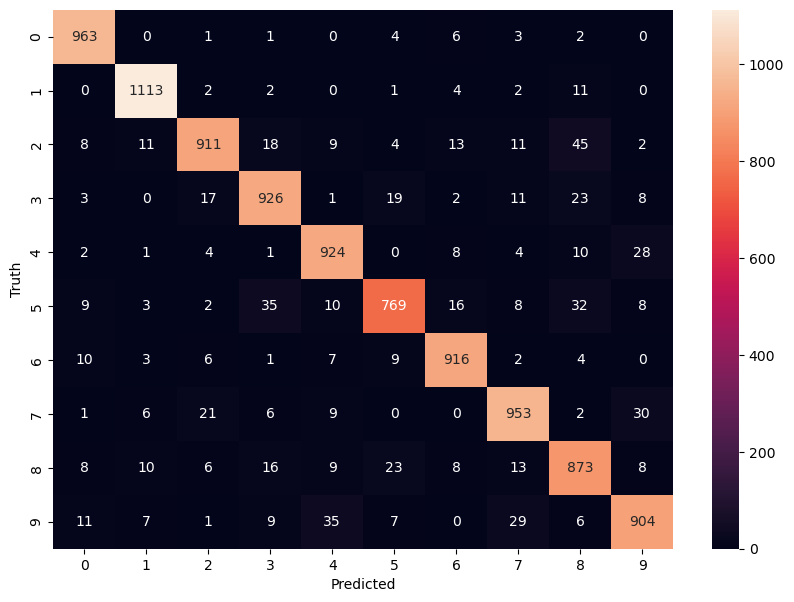

In [52]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [53]:
#model after adding hidden layer and keras flatten

In [ ]:
model =keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2795 - accuracy: 0.9209
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1267 - accuracy: 0.9626
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0872 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9801
Epoch 5/5
 798/1875 [===========>..................] - ETA: 2s - loss: 0.0495 - accuracy: 0.9846

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
plt.matshow(X_test[4])
y_predicted=model.predict(X_test)
predicted_output=np.argmax(y_predicted[4])

In [ ]:
print("Predicted Digit Output is " , predicted_output)

In [ ]:
conf_matrix=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
conf_matrix

In [ ]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')